In [463]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error, confusion_matrix, r2_score, accuracy_score
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, SGDRegressor, Ridge, Lasso
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression


In [418]:
#load the dataset
global_phonee_addiction_data = pd.read_csv(r"C:\Users\Wahaj Sajid\Desktop\Datasets\mobile_addiction_data.csv")

# Predicting Tech Savviness Score (Regression Problem)

In [428]:
pd.set_option('display.max_columns', None)
global_phonee_addiction_data.head()

,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,Gaming_Usage_Hours,Streaming_Usage_Hours,Messaging_Usage_Hours,Work_Related_Usage_Hours,Sleep_Hours,Mental_Health_Score,Depression_Score,Anxiety_Score,Online_Shopping_Hours,Has_Screen_Time_Management_App,Monthly_Data_Usage_GB,Push_Notifications_Per_Day,Tech_Savviness_Score,Self_Reported_Addiction_Level_High,Self_Reported_Addiction_Level_Low,Self_Reported_Addiction_Level_Moderate,Self_Reported_Addiction_Level_Severe
0,5.81,75,0.84,1.55,3.36,1.44,2.14,5.22,61.47,80.80,23.72,1.85,0,16.43,106,39.36,0,1,0,0
1,9.05,61,3.13,2.50,0.80,2.42,1.44,6.23,96.11,98.99,39.72,0.66,1,32.87,111,9.45,0,0,0,1
2,5.76,58,2.12,1.96,1.84,1.98,1.92,6.57,73.68,44.64,94.47,0.14,1,27.45,90,50.27,0,0,0,1
3,6.71,80,1.60,2.70,1.90,2.43,1.82,7.27,53.42,10.89,5.03,0.17,1,30.85,60,30.82,0,0,1,0
4,6.31,136,1.51,1.73,1.48,1.30,1.76,5.43,67.01,37.54,17.29,0.58,0,10.38,127,21.70,1,0,0,0


In [420]:
global_phonee_addiction_data = global_phonee_addiction_data.drop(columns=['User_ID', 'Country', 'Occupation','Income_USD','Relationship_Status','Has_Children','Urban_or_Rural','Primary_Device_Brand','Has_Night_Mode_On', 'Education_Level', 'Internet_Connection_Type', 'Age_First_Phone', 'Age', 'Physical_Activity_Hours', 'Stress_Level', 'Time_Spent_With_Family_Hours', 'Gender'])

In [453]:
#check for the null values
global_phonee_addiction_data.isnull().sum()

Daily_Screen_Time_Hours                   0
Phone_Unlocks_Per_Day                     0
Social_Media_Usage_Hours                  0
Gaming_Usage_Hours                        0
Streaming_Usage_Hours                     0
Messaging_Usage_Hours                     0
Work_Related_Usage_Hours                  0
Sleep_Hours                               0
Mental_Health_Score                       0
Depression_Score                          0
Anxiety_Score                             0
Online_Shopping_Hours                     0
Has_Screen_Time_Management_App            0
Monthly_Data_Usage_GB                     0
Push_Notifications_Per_Day                0
Tech_Savviness_Score                      0
Self_Reported_Addiction_Level_High        0
Self_Reported_Addiction_Level_Low         0
Self_Reported_Addiction_Level_Moderate    0
Self_Reported_Addiction_Level_Severe      0
dtype: int64

In [383]:
global_phonee_addiction_data.shape

(3000, 19)

In [422]:
global_phonee_addiction_data = pd.get_dummies(global_phonee_addiction_data, columns=['Self_Reported_Addiction_Level'])

In [427]:
#encode the categorical data 
encoder =  LabelEncoder()

non_numeric_columns = global_phonee_addiction_data.select_dtypes(exclude='number')


for column in non_numeric_columns.columns:
    global_phonee_addiction_data[column] = encoder.fit_transform(global_phonee_addiction_data[[column]])
    

c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [426]:
#check for the negative values

numeric_data = global_phonee_addiction_data.select_dtypes(exclude=['object', 'bool'])

for column in numeric_data.columns:
    print(column, len(global_phonee_addiction_data[column][global_phonee_addiction_data[column] < 0]))

Daily_Screen_Time_Hours 0
Phone_Unlocks_Per_Day 0
Social_Media_Usage_Hours 0
Gaming_Usage_Hours 0
Streaming_Usage_Hours 0
Messaging_Usage_Hours 0
Work_Related_Usage_Hours 0
Sleep_Hours 0
Mental_Health_Score 0
Depression_Score 0
Anxiety_Score 0
Online_Shopping_Hours 0
Monthly_Data_Usage_GB 0
Push_Notifications_Per_Day 0
Tech_Savviness_Score 0


In [425]:
#convert the negative values to positive values
numeric_data1 = global_phonee_addiction_data.select_dtypes(exclude=['object', 'bool'])

global_phonee_addiction_data[numeric_data1.columns] = global_phonee_addiction_data[numeric_data1.columns].abs()

In [480]:
#defining x and y
x = global_phonee_addiction_data.drop(columns=['Tech_Savviness_Score'], axis=1)
y = global_phonee_addiction_data['Tech_Savviness_Score']

In [481]:
#tain test split the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [460]:
x_test_df  =pd.DataFrame(x_test)
y_test_df = pd.DataFrame(y_test)
test_data = pd.concat([x_test_df, y_test_df], axis=1)
test_data.head()

,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,Gaming_Usage_Hours,Streaming_Usage_Hours,Messaging_Usage_Hours,Work_Related_Usage_Hours,Sleep_Hours,Mental_Health_Score,Depression_Score,Anxiety_Score,Online_Shopping_Hours,Has_Screen_Time_Management_App,Monthly_Data_Usage_GB,Push_Notifications_Per_Day,Self_Reported_Addiction_Level_High,Self_Reported_Addiction_Level_Low,Self_Reported_Addiction_Level_Moderate,Self_Reported_Addiction_Level_Severe,Tech_Savviness_Score
1431,7.39,87,2.89,2.60,3.49,2.11,1.89,7.40,40.16,13.55,24.41,0.45,1,18.27,134,0,1,0,0,31.17
2449,3.44,79,3.14,0.43,2.28,1.40,1.52,7.26,29.26,4.55,4.44,0.97,0,34.65,46,0,1,0,0,99.11
988,5.33,14,2.08,1.31,2.49,1.01,2.10,8.92,17.09,67.22,89.13,1.45,1,9.46,139,1,0,0,0,12.86
2700,9.18,120,1.67,1.94,1.39,1.92,1.09,7.04,36.62,65.94,34.55,0.98,1,23.54,94,0,1,0,0,80.54
1589,6.49,95,1.49,1.70,1.01,1.58,2.37,7.16,84.22,55.94,69.62,1.78,0,33.78,41,0,1,0,0,58.95


In [482]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

#scale the x features
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

#scale the y target
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test= y_scaler.transform(y_test.values.reshape(-1, 1))

In [432]:
x_train.shape

(2400, 19)

In [394]:
#checking the importance of features. 
x_df = pd.DataFrame(x_train, columns=x.columns)

selector = SelectKBest(score_func=f_regression, k = 20)
x_new = selector.fit_transform(x_df, y_train)

selected_features = x_df.columns[selector.get_support()]
print(selected_features)

x_df.head()


Index(['Daily_Screen_Time_Hours', 'Phone_Unlocks_Per_Day',
       'Social_Media_Usage_Hours', 'Gaming_Usage_Hours',
       'Streaming_Usage_Hours', 'Messaging_Usage_Hours',
       'Work_Related_Usage_Hours', 'Sleep_Hours', 'Mental_Health_Score',
       'Depression_Score', 'Anxiety_Score', 'Online_Shopping_Hours',
       'Has_Screen_Time_Management_App', 'Monthly_Data_Usage_GB',
       'Self_Reported_Addiction_Level_High',
       'Self_Reported_Addiction_Level_Low',
       'Self_Reported_Addiction_Level_Moderate',
       'Self_Reported_Addiction_Level_Severe'],
      dtype='object')


c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=18. All the features will be returned.
  warnings.warn(
c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,Gaming_Usage_Hours,Streaming_Usage_Hours,Messaging_Usage_Hours,Work_Related_Usage_Hours,Sleep_Hours,Mental_Health_Score,Depression_Score,Anxiety_Score,Online_Shopping_Hours,Has_Screen_Time_Management_App,Monthly_Data_Usage_GB,Self_Reported_Addiction_Level_High,Self_Reported_Addiction_Level_Low,Self_Reported_Addiction_Level_Moderate,Self_Reported_Addiction_Level_Severe
0,0.665109,0.143646,0.588119,0.211934,0.922780,0.846405,0.442748,0.343542,0.235412,0.053212,0.135614,0.146154,0.0,0.707322,1.0,0.0,0.0,0.0
1,0.383178,0.348066,0.465347,0.267490,0.235521,0.663399,0.417939,0.507324,0.299970,0.033069,0.748975,0.442308,0.0,0.259996,0.0,0.0,0.0,1.0
2,0.390187,0.364641,0.205941,0.580247,0.420849,0.303922,0.574427,0.390146,0.148334,0.699168,0.755276,0.184615,1.0,0.392368,1.0,0.0,0.0,0.0
3,0.576324,0.458564,0.423762,0.586420,0.575290,0.653595,0.524809,0.304927,0.121309,0.692755,0.188719,0.200000,0.0,0.513602,0.0,1.0,0.0,0.0
4,0.765576,0.359116,0.263366,0.425926,0.399614,0.326797,0.477099,0.517976,0.074067,0.907907,0.835884,0.238462,1.0,0.663867,0.0,0.0,1.0,0.0


In [548]:
g_model  = GradientBoostingRegressor(learning_rate=0.1, n_estimators=2000)
g_model.fit(x_train, y_train)

c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(n_estimators=2000)

In [549]:
#Evaluating model on training data
predictions = g_model.predict(x_train)
mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
print(mse, mae)

0.0034285428191384677 0.04467623037113797


In [550]:
#Evaluating model on testing data
predictions = g_model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(mse, mae)

0.10013283088055157 0.2678829449791334


In [560]:
#predict with actual values
feature_test = np.array([[3, 90, 3.14, 0.43, 2.28, 1.40, 1.52, 7.26, 29.26,4.55, 4.44, 0.97, 0, 34.65, 46, 0, 1, 0, 0]])

scaled_features = x_scaler.transform(feature_test)

prediction = g_model.predict(scaled_features)

actual_prediction = y_scaler.inverse_transform(prediction.reshape(-1,1))
print(actual_prediction)


[[96.95690232]]


c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [274]:
#train the neural network
model = Sequential([
    Dense(units=20, activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=1, activation='relu')
])
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy())
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
 1/60 ━━━━━━━━━━━━━━━━━━━━ 1:19 1s/step - loss: 0.0000e+00

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\asyncio\base_events.py", line 608, in run_forever

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\asyncio\events.py", line 84, in _run

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Wahaj Sajid\AppData\Local\Temp\ipykernel_15876\2341563105.py", line 9, in <module>

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 371, in fit

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 219, in function

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 132, in multi_step_on_iterator

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 113, in one_step_on_data

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 60, in train_step

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 351, in compute_loss

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 690, in __call__

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 699, in call

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 67, in __call__

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 33, in call

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 2246, in sparse_categorical_crossentropy

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\ops\nn.py", line 1964, in sparse_categorical_crossentropy

  File "c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_213988]

In [91]:
#training data evaluation 
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f'Train Loss: ', train_loss)
print(f'Train Accuracy: ', train_accuracy)
#testing data evaluation 
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: ', test_loss)
print(f'Test Accuracy: ', test_accuracy)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 9.5470e-04 - loss: 0.0103 
Train Loss:  0.012834672816097736
Train Accuracy:  0.00041666667675599456
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 4.7525e-07  
Test Loss:  4.782278892889735e-07
Test Accuracy:  0.0


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[521  27  31  32]
 [ 29 514  26  36]
 [ 27  37 489  31]
 [ 32  38  39 491]]


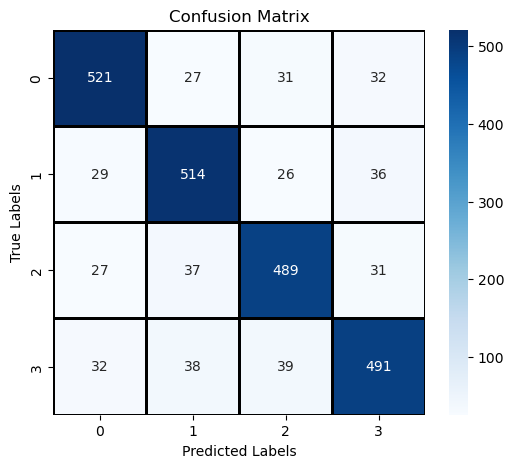

In [49]:
#train data prediction
train_predict = model.predict(x_train)
train_cm = confusion_matrix(y_train, train_predict.argmax(axis=1))
print(train_cm)

plt.figure(figsize=(6, 5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[48 30 37 38]
 [58 26 32 35]
 [52 27 27 40]
 [53 36 23 38]]


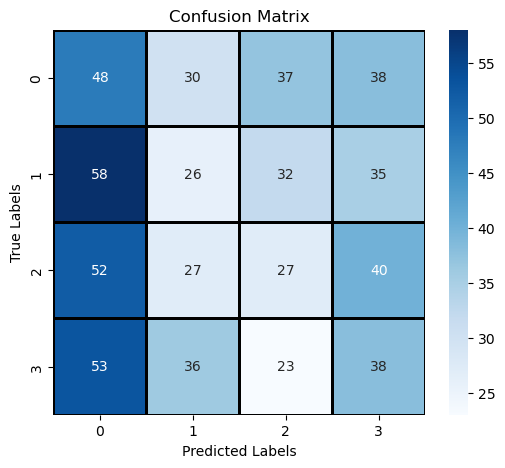

In [46]:
#test data prediction
test_predict = model.predict(x_test)
test_cm = confusion_matrix(y_test, test_predict.argmax(axis = 1))
print(test_cm)


plt.figure(figsize=(6, 5))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Training the model on minimum features

In [ ]:
data = global_phonee_addiction_data[['Age', 'Gender', 'Daily_Screen_Time_Hours', 'Phone_Unlocks_Per_Day', 'Social_Media_Usage_Hours', 'Gaming_Usage_Hours', 'Streaming_Usage_Hours', 'Messaging_Usage_Hours', 'Work_Related_Usage_Hours','Sleep_Hours', 'Physical_Activity_Hours', 'Self_Reported_Addiction_Level', 'Mental_Health_Score', 'Depression_Score', 'Anxiety_Score', 'Stress_Level', 'Has_Screen_Time_Management_App']].copy()

In [308]:
data.head()

,Age,Gender,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,Gaming_Usage_Hours,Streaming_Usage_Hours,Messaging_Usage_Hours,Work_Related_Usage_Hours,Sleep_Hours,Physical_Activity_Hours,Self_Reported_Addiction_Level,Mental_Health_Score,Depression_Score,Anxiety_Score,Stress_Level
0,32,Male,5.81,75,0.84,-1.55,3.36,1.44,2.14,5.22,1.32,Low,61.47,80.80,23.72,95.80
1,26,Male,9.05,61,3.13,2.50,0.80,2.42,1.44,6.23,0.66,Severe,96.11,98.99,39.72,25.03
2,70,Other,5.76,58,2.12,1.96,1.84,1.98,1.92,6.57,1.93,Severe,73.68,44.64,94.47,99.54
3,44,Female,6.71,80,1.60,2.70,1.90,2.43,1.82,7.27,0.94,Moderate,53.42,10.89,5.03,66.49
4,46,Other,6.31,136,1.51,1.73,1.48,1.30,1.76,5.43,1.04,High,67.01,37.54,17.29,14.72


In [309]:
#encode the categorical data
gender_encoder = LabelEncoder()
addiction_level_encoder = LabelEncoder()
data['Gender'] = gender_encoder.fit_transform(data['Gender'])
data['Self_Reported_Addiction_Level'] = addiction_level_encoder.fit_transform(data['Self_Reported_Addiction_Level'])

In [310]:
#checking for the negative values in the columns because hours cannot be in the negative. 
for column in data.columns:
    print(column, len(data[column][data[column]<0]))

Age 0
Gender 0
Daily_Screen_Time_Hours 9
Phone_Unlocks_Per_Day 1
Social_Media_Usage_Hours 70
Gaming_Usage_Hours 213
Streaming_Usage_Hours 67
Messaging_Usage_Hours 2
Work_Related_Usage_Hours 53
Sleep_Hours 0
Physical_Activity_Hours 80
Self_Reported_Addiction_Level 0
Mental_Health_Score 0
Depression_Score 0
Anxiety_Score 0
Stress_Level 0


In [311]:
#convert the negative values to postive values
data[data.columns] = data[data.columns].abs()

In [312]:
print(data.isnull().sum())

Age                              0
Gender                           0
Daily_Screen_Time_Hours          0
Phone_Unlocks_Per_Day            0
Social_Media_Usage_Hours         0
Gaming_Usage_Hours               0
Streaming_Usage_Hours            0
Messaging_Usage_Hours            0
Work_Related_Usage_Hours         0
Sleep_Hours                      0
Physical_Activity_Hours          0
Self_Reported_Addiction_Level    0
Mental_Health_Score              0
Depression_Score                 0
Anxiety_Score                    0
Stress_Level                     0
dtype: int64


In [201]:
#visualize each column
# for column in data.columns:
#     if(column == "Gender" or column == "Self_Reported_Addiction_Level"):
#         continue
#     else:
#         print(data[column].skew())
#         plt.figure(figsize=(6,4))
#         sns.histplot(data[column], kde = True, bins = 30)
#         plt.title(f"Distribution of {column}")
#         plt.xlabel(column)
#         plt.ylabel("frequency")
#         plt.show()
    

In [300]:
#Standardize the data using the Standard Scalar
x_scaler = StandardScaler()
for column in data.columns:
    if(column == "Gender" or column == "Self_Reported_Addiction_Level"):
        continue
    else:
        data[column] = x_scaler.fit_transform(data[[column]])

In [313]:
#check the data after some preprocessing 
data.head()

,Age,Gender,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,Gaming_Usage_Hours,Streaming_Usage_Hours,Messaging_Usage_Hours,Work_Related_Usage_Hours,Sleep_Hours,Physical_Activity_Hours,Self_Reported_Addiction_Level,Mental_Health_Score,Depression_Score,Anxiety_Score,Stress_Level
0,32,1,5.81,75,0.84,1.55,3.36,1.44,2.14,5.22,1.32,1,61.47,80.80,23.72,95.80
1,26,1,9.05,61,3.13,2.50,0.80,2.42,1.44,6.23,0.66,3,96.11,98.99,39.72,25.03
2,70,2,5.76,58,2.12,1.96,1.84,1.98,1.92,6.57,1.93,3,73.68,44.64,94.47,99.54
3,44,0,6.71,80,1.60,2.70,1.90,2.43,1.82,7.27,0.94,2,53.42,10.89,5.03,66.49
4,46,2,6.31,136,1.51,1.73,1.48,1.30,1.76,5.43,1.04,0,67.01,37.54,17.29,14.72


In [314]:
#defining x and y
x = data.drop(columns=['Self_Reported_Addiction_Level'], axis=1)
y = data['Self_Reported_Addiction_Level']

In [315]:
#train test split the model
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=42)

In [316]:
# training the model
model = Sequential([
    Dense(units = 60, activation='relu'),
    Dense(units = 30, activation='relu'),
    Dense(units=4, activation='softmax')
])

model.compile(optimizer = 'adam', loss= SparseCategoricalCrossentropy, metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2715 - loss: 7.3864 - val_accuracy: 0.2542 - val_loss: 2.1345
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2591 - loss: 1.9302 - val_accuracy: 0.2562 - val_loss: 1.7439
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2521 - loss: 1.7120 - val_accuracy: 0.2438 - val_loss: 1.7454
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2728 - loss: 1.5901 - val_accuracy: 0.2396 - val_loss: 1.6016
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2805 - loss: 1.5582 - val_accuracy: 0.2250 - val_loss: 1.7361
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2688 - loss: 1.5772 - val_accuracy: 0.2333 - val_loss: 1.6261
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2788 - loss: 1.5075 - val_accuracy: 0.2562 - val_loss: 1.5844
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3018 - loss: 1.4592 - val_accuracy: 0.2104 - v

In [305]:
#evaluating the model on training dataset
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"loss: ",train_loss)
print(f"accuracy: ",train_accuracy)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7791 - loss: 0.6784
loss:  0.9819880127906799
accuracy:  0.6745833158493042


In [306]:
#evaluating the model on testing dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"loss: ",test_loss)
print(f"accuracy: ",test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2653 - loss: 2.2767  
loss:  2.3197386264801025
accuracy:  0.2433333396911621
